In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [36]:
X.shape, y.shape

((50000, 15), (50000,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [41]:
# alpha : float  lambda
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [42]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [43]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t −  α(-y_n + σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [0]:
import random
import math
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [46]:
pd.DataFrame(data = X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.266454,0.207401,0.207484,-0.491013,-0.700210,-0.294138,0.273313,0.695944,-0.030006,0.006645,0.609432,-1.110552,-0.528438,-0.511179,0.231617
std,2.126825,1.970479,1.874263,1.762062,1.649456,1.723327,2.050374,1.986726,4.385574,2.094178,4.066106,3.406985,2.612897,2.073009,2.525177
min,-8.360184,-8.791185,-7.383914,-7.692214,-7.729431,-7.750905,-8.661642,-7.848835,-23.924167,-8.678568,-17.056269,-18.299831,-13.340440,-8.971211,-12.804785
25%,-1.162846,-1.090813,-1.084520,-1.675401,-1.805095,-1.430182,-1.103160,-0.607170,-2.989116,-1.427887,-1.924670,-3.311911,-2.213970,-1.899357,-1.422223
50%,0.241495,0.235629,0.183688,-0.543458,-0.705345,-0.354602,0.275627,0.705302,0.027739,-0.018822,0.635744,-1.163694,-0.598621,-0.497557,0.196780
75%,1.683281,1.501122,1.461999,0.656996,0.401761,0.784513,1.660565,2.002337,2.912834,1.382269,3.155235,1.049781,1.068512,0.908975,1.822896
max,11.017564,8.879740,8.065992,7.255772,6.487590,7.808481,8.361272,10.323580,19.131734,10.206260,18.604384,15.941515,15.278376,7.844041,14.235675


In [47]:
len([i for i in y if i == 1])/len(y)

0.30192

In [0]:
#reshaping y and weight vector for compatibilty
# adding a 0 at the first position of w as the intial intercept for weight vector. this means w[0] is our intercept
# adding a column of 1s to X. This will work as the compatibility term for our intercept.
# now our eq is from y = w.T*X + b to y = w.T*X . 
# this concept has been taken from Andrew Ng's machine learning course

y = y.reshape(-1,1)

#X = np.hstack((np.ones_like(X[:,0]).reshape(-1,1),X))
w = np.zeros_like(X[0]).reshape(-1,1)

np.random.seed(0)
W = np.random.uniform(0,1,size=(X.shape[1],1))
b=0.5

eta0  = 0.0001 # learning rate
alpha = 0.0001 # regularizing term i.e. lambda
N = len(y)

In [0]:
#Splitting X,y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [50]:
print(X[0,:])

[ 1.17133535 -1.00849691  0.40726112 -2.05334509 -1.37381592 -2.99724545
  0.7787227   0.87207405 -2.17362041  1.22938588  0.21266735 -2.21599818
 -1.8801447  -0.61688062 -0.68442615]


* All the value of weight vector have been initialized to 0.

In [51]:
print(w.shape)
print(X.shape)
print(y.shape)

(15, 1)
(50000, 15)
(50000, 1)


In [0]:
# Definition of sigmoid function used in Logistic Regression
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [0]:
#the below function provides the probabilistic prediction of a datapoint in X.
def pred(X,w,b):
  prediction = sigmoid(np.dot(X,w)+b)
  for i in range(len(prediction)):
    if prediction[i] == 1.0:
      prediction[i] = sigmoid(36)
  # shape is m * 1
  return(prediction)

In [0]:
# https://www.geeksforgeeks.org/multiplication-two-matrices-single-line-using-numpy-python/
# https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#training
# Below function calculates the cost/loss of a prediction
# alpha is the regularization multiplyer here. i.e. lambda
def cost_func(X,y,w,lamda,b):
  y = y.reshape(-1,1)
  #cost =  sum(np.log(1-np.exp(-y*(np.dot(X,w)))))
  cost = (np.sum(-y*np.log(pred(X,w,b)) - (1-y)*np.log(1-pred(X,w,b))) + np.sum((lamda/2)*w**2))/len(y)
  return cost


In [55]:
train_cost_list = []
test_cost_list = []
train_cost_list.append(cost_func(X_train,y_train,w,alpha,b))
print(train_cost_list) # Avg loss of training set when weight vector is 0s.

[0.8230236508467732]


In [56]:
#for cross-checking
from sklearn.metrics import log_loss

loss = log_loss(y, pred(X,w,b))
loss

0.8231169841801067

$w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t −  α(-y_n + σ((w^{(t)})^{T} x_n+b^{t}))$ 

In [0]:
# derivative of cost function : https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression
# below definition is used to optimize the lambda by subtracting its value for LR* (dJ/dw at w) .
# lr is the learning rate at which we want our w to be optimized
def optimized(X,y,w,lr,lamda,b):
  # grad = y*np.log(pred(X,w)) + (1-y)*np.log(1-pred(X,w)) + alpha*np.dot(w.T,w)
  #def_grad = (np.dot(X.T,(pred(X,w) - y)) + (lamda*2*w))/len(y)
  #w = w - lr*def_grad
  N = len(y)
  #w = (1 - lr*lamda/N)*w + lr*np.dot(X.T,(y-pred(X,w,b)))
  w = w - (lr/N)*(np.dot(X.T,(pred(X,w,b) - y)) + lamda*w)
  b = b - lr*np.sum(pred(X,w,b) - y)/N
  
  return w,b

In [58]:
# since we dont know how many iteration it will take to find the optimized w which will give us the least loss,
# we are using while loop with a stop condition
# condition : when the last two loss values in the train_cost_list are very very close(~0.0000001) then we can stop the loop
# We are using the X_train to optimize the w but we are storing lossvalues of train and test set to compare them.
from tqdm import tqdm 

iter_ = True
w,b = optimized(X_train,y_train,w,0.001,alpha,b)
train_cost_list.append(cost_func(X_train,y_train,w,alpha,b))
test_cost_list.append(cost_func(X_test,y_test,w,alpha,b))
iter_count = 0
while iter_:
  for j in range(len(X_train)):
    w,b = optimized(X_train[j:j+1,:],y_train[j],w,0.0001,alpha,b)

  #row = random.sample(range(len(X_train)),50000)
  #xx = X_train[row,:]
  #yy = y_train[row]
  #w,b = optimized(xx,yy,w,0.05,alpha,b)
 
  tr_cost = cost_func(X_train,y_train,w,alpha,b)
  te_cost = cost_func(X_test,y_test,w,alpha,b)

  train_cost_list.append(tr_cost)
  test_cost_list.append(te_cost)
  iter_count += 1
  if abs(train_cost_list[-1] - train_cost_list[-2]) < 0.000001:
    iter_ = False
  print(train_cost_list[-1])
  print(iter_count)

0.42371782703791666
1
0.39800627145166295
2
0.38806777159040995
3
0.38336660845647674
4
0.38098372727892515
5
0.3797313958790109
6
0.3790579078899805
7
0.37868980842591105
8
0.3784861790373487
9
0.3783724716027518
10
0.37830849456722376
11
0.37827226783431356
12
0.37825163785070903
13
0.3782398262523533
14
0.3782330264297055
15
0.3782290885720741
16
0.37822679273066895
17
0.3782254436521609
18
0.3782246434867191
19


In [59]:

print(X.shape)
print(w.shape)
#print(b.shape)


(50000, 15)
(15, 1)


In [0]:
w = np.array(w).reshape(-1,1)

In [61]:
print(train_cost_list[-1])
test_cost_list[-1]

0.3782246434867191


0.3802148961624491

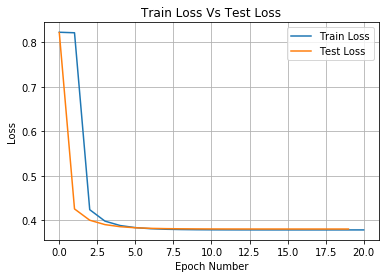

In [62]:
# plotting train and test loss

plt.plot(train_cost_list,label = 'Train Loss')
plt.plot(test_cost_list,label = 'Test Loss')

plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("Loss")

plt.title("Train Loss Vs Test Loss")
plt.grid()
plt.show()


In [63]:
# the optimized weight vector and the intercept
print('best weight : \n',w)
print('best intercept :',b)


best weight : 
 [[-4.28773996e-01]
 [ 1.92691533e-01]
 [-1.48022081e-01]
 [ 3.37904475e-01]
 [-2.20005537e-01]
 [ 5.69066368e-01]
 [-4.45018751e-01]
 [-9.00689817e-02]
 [ 2.21265720e-01]
 [ 1.73205339e-01]
 [ 1.98217723e-01]
 [-2.51693428e-04]
 [-8.08605278e-02]
 [ 3.38885755e-01]
 [ 2.28994749e-02]]
best intercept : -0.8871356130232607


In [64]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [65]:
# Avg Accuracy of our prediction
def pred_(w, X):
    N = len(X)
    predict = []
    for i in range(N):
        if pred(X[i],w,b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict).reshape(-1,1)
print(1-np.sum(y_train - pred_(w,X_train))/len(X_train))
print(1-np.sum(y_test  - pred_(w,X_test))/len(X_test))

0.95264
0.95032
